In [43]:
import pickle 
with open('8/result/False_32_hamiltonian_simulation_8qiskit_only.pkl', 'rb') as f:
    result = pickle.load(f)

In [44]:
print({key: item for key, item in result.items()
    if key not in ('print', 'qiskit circuit', 'U')})

{'n_qubits': 8, '#gate': 3437, '#two-qubit gate': 1143, 'depth': 1559, 'cpu time': 139715.06534137955, 'use heuristic': False, 'n_unitary_candidates': 32, 'heuristic_takeeffect_count': 0, 'heuristic_takeeffect_prob': 0.0, 'iter_count': 38, 'synthesis_time': 8164.58331823349}


In [45]:

qsvm = {'n_qubits': 8, '#gate': 560, '#two-qubit gate': 184, 'depth': 269, 'cpu time': 8977.474279744176, 'use heuristic': False, 'n_unitary_candidates': 32, 'heuristic_takeeffect_count': 0, 'heuristic_takeeffect_prob': 0.0, 'iter_count': 4, 'synthesis_time': 660.3797883987427}

ghz = {'n_qubits': 8, '#gate': 5282, '#two-qubit gate': 1758, 'depth': 2527, 'cpu time': 148926.90782611704, 'use heuristic': False, 'n_unitary_candidates': 32, 'heuristic_takeeffect_count': 0, 'heuristic_takeeffect_prob': 0.0, 'iter_count': 70, 'synthesis_time': 11659.238934516907}


ising = {'n_qubits': 8, '#gate': 4289, '#two-qubit gate': 1427, 'depth': 1923, 'cpu time': 78767.16743919047, 'use heuristic': False, 'n_unitary_candidates': 32, 'heuristic_takeeffect_count': 0, 'heuristic_takeeffect_prob': 0.0, 'iter_count': 36, 'synthesis_time': 5196.237821340561}

hamiltonian_simulation = {'n_qubits': 8, '#gate': 3437, '#two-qubit gate': 1143, 'depth': 1559, 'cpu time': 139715.06534137955, 'use heuristic': False, 'n_unitary_candidates': 32, 'heuristic_takeeffect_count': 0, 'heuristic_takeeffect_prob': 0.0, 'iter_count': 38, 'synthesis_time': 8164.58331823349}

In [60]:
import json
with open('8/result/qsvm_8qiskit_only.json', mode='rb') as f:
    qsvm_base = json.load(f)
with open('8/result/ising_8qiskit_only.json', mode='rb') as f:
    ising_base = json.load(f)
with open('8/result/ghz_8qiskit_only.json', mode='rb') as f:
    ghz_base = json.load(f)
with open('8/result/hamiltonian_simulation_8qiskit_only.json', mode='rb') as f:
    hamiltonian_simulation_base = json.load(f)

In [61]:
new = [qsvm,ghz,ising,hamiltonian_simulation]
base =[qsvm_base,ghz_base,ising_base,hamiltonian_simulation_base]

In [62]:
for ele in base:
    del ele['Unitary']
    del ele['Metrics'][0]['Circuit']
    del ele['Metrics'][1]['Circuit']
    print(ele)

{'Experiment Name': 'qsvm_8qiskit_only', 'Num of Qubits': 8, 'Metrics': [{'Synthesiser': 'Qiskit Synthesiser', 'Execution Time': 323.8016381263733, 'CNOT Count': 30645, 'Depth': 60305, 'CPU time': 323.8016381263733, 'gate_num': 78053}, {'Synthesiser': 'QSD Synthesiser', 'Execution Time': 104.43194127082825, 'CNOT Count': 36099, 'Depth': 70543, 'CPU time': 104.43194127082825, 'gate_num': 93068}]}
{'Experiment Name': 'ghz_8qiskit_only', 'Num of Qubits': 8, 'Metrics': [{'Synthesiser': 'Qiskit Synthesiser', 'Execution Time': 311.59396982192993, 'CNOT Count': 30861, 'Depth': 60519, 'CPU time': 311.59396982192993, 'gate_num': 78267}, {'Synthesiser': 'QSD Synthesiser', 'Execution Time': 109.5046956539154, 'CNOT Count': 36318, 'Depth': 70757, 'CPU time': 109.5046956539154, 'gate_num': 93282}]}
{'Experiment Name': 'ising_8qiskit_only', 'Num of Qubits': 8, 'Metrics': [{'Synthesiser': 'Qiskit Synthesiser', 'Execution Time': 317.56683015823364, 'CNOT Count': 30764, 'Depth': 60425, 'CPU time': 317.

In [48]:
[ele['Metrics'][0]['Depth'] for ele in base]

[60305, 60519, 60425, 60394]

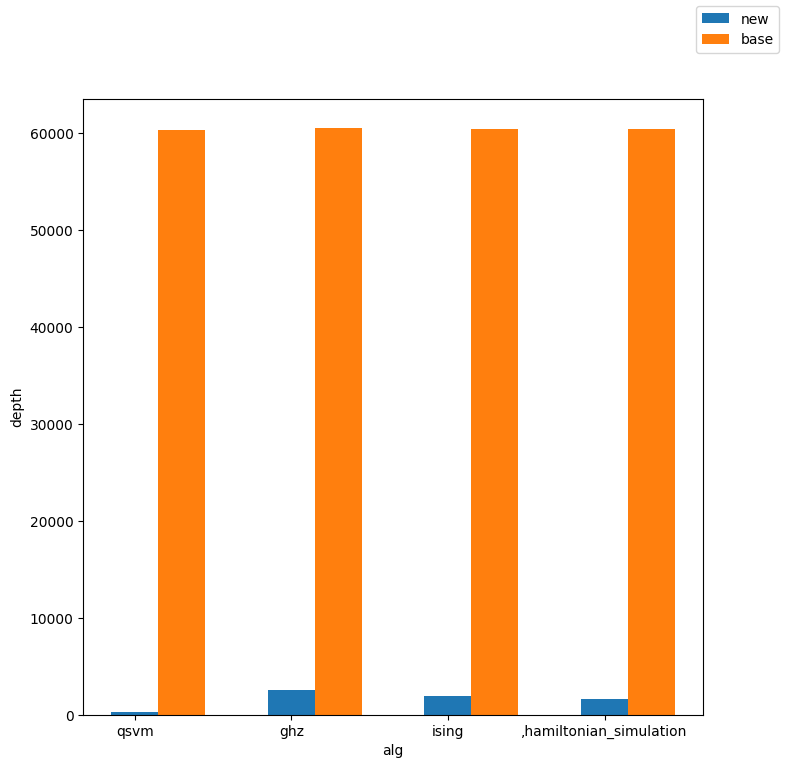

In [51]:
import matplotlib.pyplot as plt
import numpy as np 
fig , ax =plt.subplots(figsize = (8,8))
x = np.array([i for i in range(len(new))]) *10
y_new = [ele['depth'] for ele in new]
y_base = [ele['Metrics'][0]['Depth'] for ele in base]
ax.bar(x, y_new,width=3,label = 'new' )
ax.bar(x + 3, y_base, width=3,label = 'base' )
ax.set_xticks(x)
ax.set_xticklabels(['qsvm','ghz','ising',',hamiltonian_simulation'])
ax.set_xlabel('alg')
ax.set_ylabel('depth')
fig.legend()

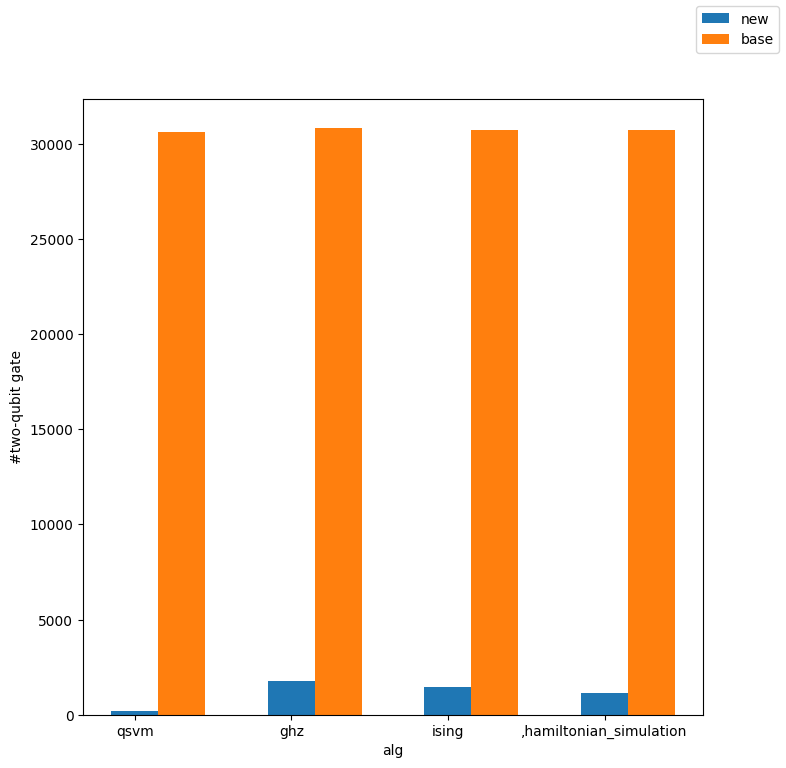

In [50]:
import matplotlib.pyplot as plt
import numpy as np 
fig , ax =plt.subplots(figsize = (8,8))
x = np.array([i for i in range(len(new))]) *10
y_new = [ele['#two-qubit gate'] for ele in new]
y_base = [ele['Metrics'][0]['CNOT Count'] for ele in base]
ax.bar(x, y_new,width=3,label = 'new' )
ax.bar(x + 3, y_base, width=3,label = 'base' )
ax.set_xticks(x)
ax.set_xticklabels(['qsvm','ghz','ising',',hamiltonian_simulation'])
ax.set_xlabel('alg')
ax.set_ylabel('#two-qubit gate')
fig.legend()